# Using Napari-SpatialData 

This tutorial shows how to load SpatialData objects into the Napari-Spatialdata plugin, and use it with the "View" and "Scatter" widgets for visualising coordinates.

## Import packages and data

There are two options to install napari-spatialdata:

(1) Run `pip install napari-spatialdata`

or, 

(2) Clone this [repo](https://github.com/scverse/napari-spatialdata) and run `pip install -e .`


After installing napari-spatialdata, insert the file path of the dataset in the <em>FILE_PATH</em> variable below and execute the cell. This loads the dataset from the filepath and creates  a {class}`spatialdata.SpatialData` object. We'll use this object with the class `Interactive` to visualise this dataset in Napari.

Next, we will download the Nanostring dataset (cosmx_io) for analysis. 

If on Windows, download the dataset from https://s3.embl.de/spatialdata/spatialdata-sandbox/cosmx_io.zip.

In on Linux, uncomment the lines below to download the dataset. 

In [ ]:
# !mkdir tutorial_data
# !mkdir tutorial_data/nanostring_data
# !wget -P tutorial_data/nanostring_data https://s3.embl.de/spatialdata/spatialdata-sandbox/cosmx_io.zip
# !unzip tutorial_data/nanostring_data/cosmx_io.zip -d tutorial_data/nanostring_data

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from napari_spatialdata import Interactive
from spatialdata import SpatialData

plt.rcParams['figure.figsize'] = (20, 20)

sdata = SpatialData.read("tutorial_data/nanostring_data/data.zarr")

## Visualise in napari

We can instantiate the `Interactive` class with our {class}`spatialdata.SpatialData` object, and view it in Napari.

In [ ]:
interactive = Interactive(sdata)
interactive.run()

This executes an empty Napari viewer. The SpatialData widget is in the bottom left hand corner and consists of two boxes, "Coordinate System" and "Elements". 

A {class}`spatialdata.SpatialData` object groups together five {obj}`spatialdata.models.SpatialElement`: Images (raster images), Labels (e.g. segmentation masks), Points (e.g. transcripts locations, molecular probes), Shapes (regions of interests, array capture locations etc.), and Table (where the molecular profiles and annotations are stored). Each SpatialElement can be associated with a coordinate system and the transformation required to align that element to it.

(-0.5, 1496.5, 953.5, -0.5)

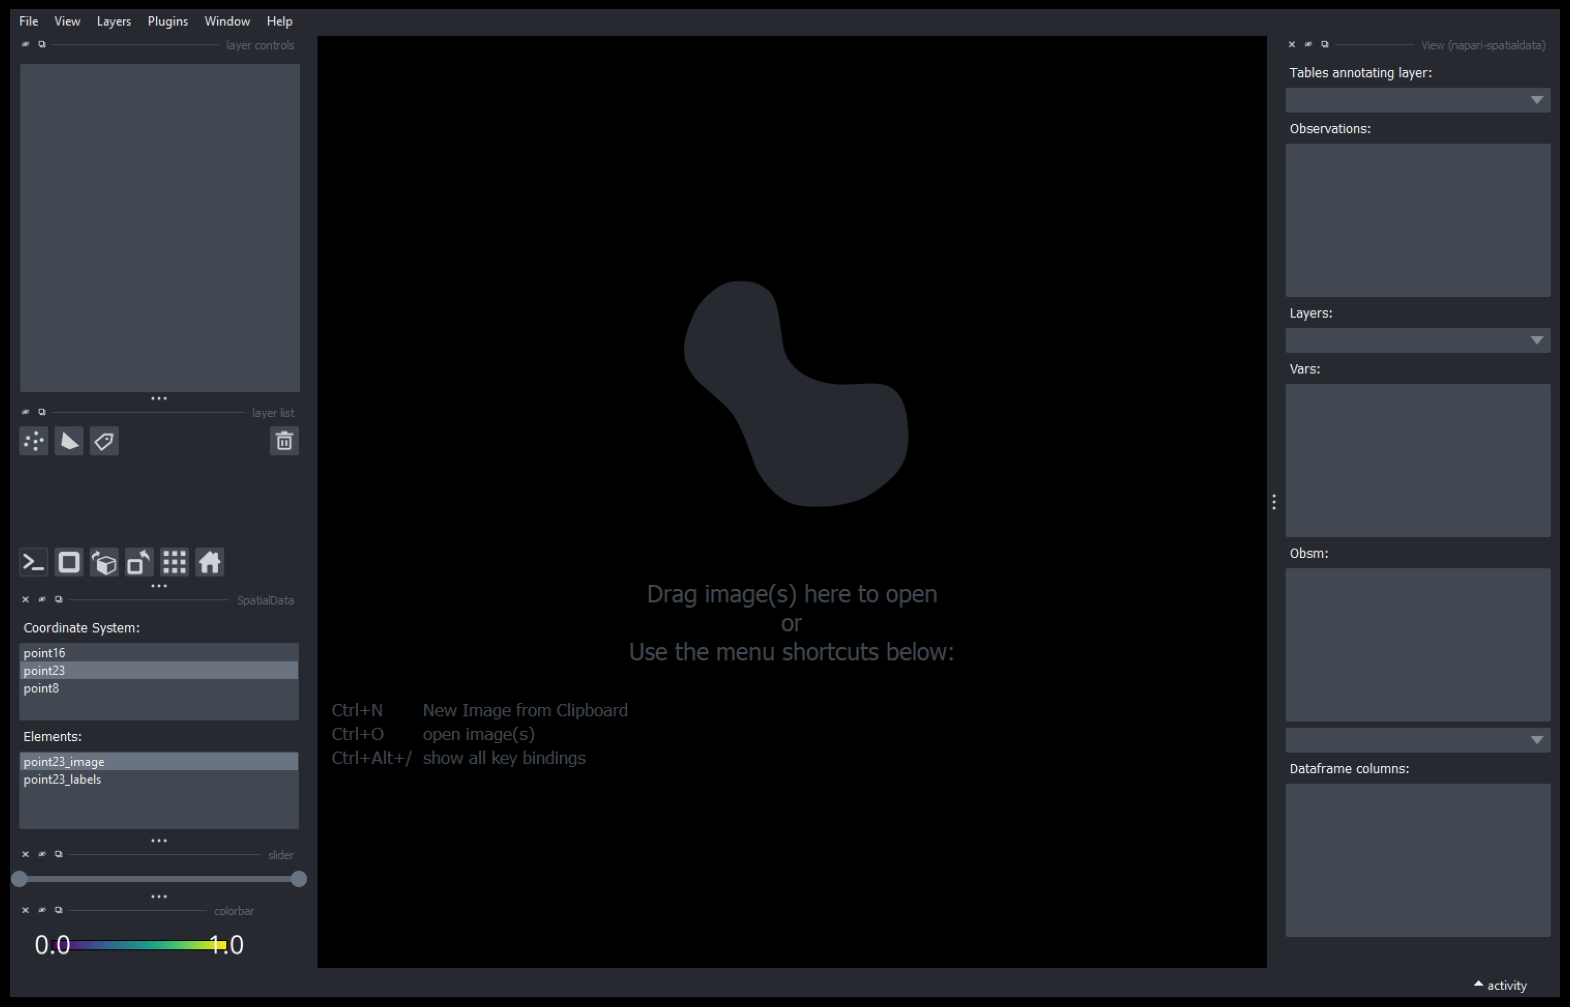

In [7]:
plt.imshow(interactive.screenshot())
plt.axis('off')

We can pick a coordinate system in the first box. This automatically updates the next box, which shows the elements associated with that coordinate system. Clicking on an element loads it as a layer into Napari.

In the example below, we selected the coordinate system "point23" and loaded "point23_image" and "point23_labels" to the Napari viewer.

(-0.5, 1496.5, 953.5, -0.5)

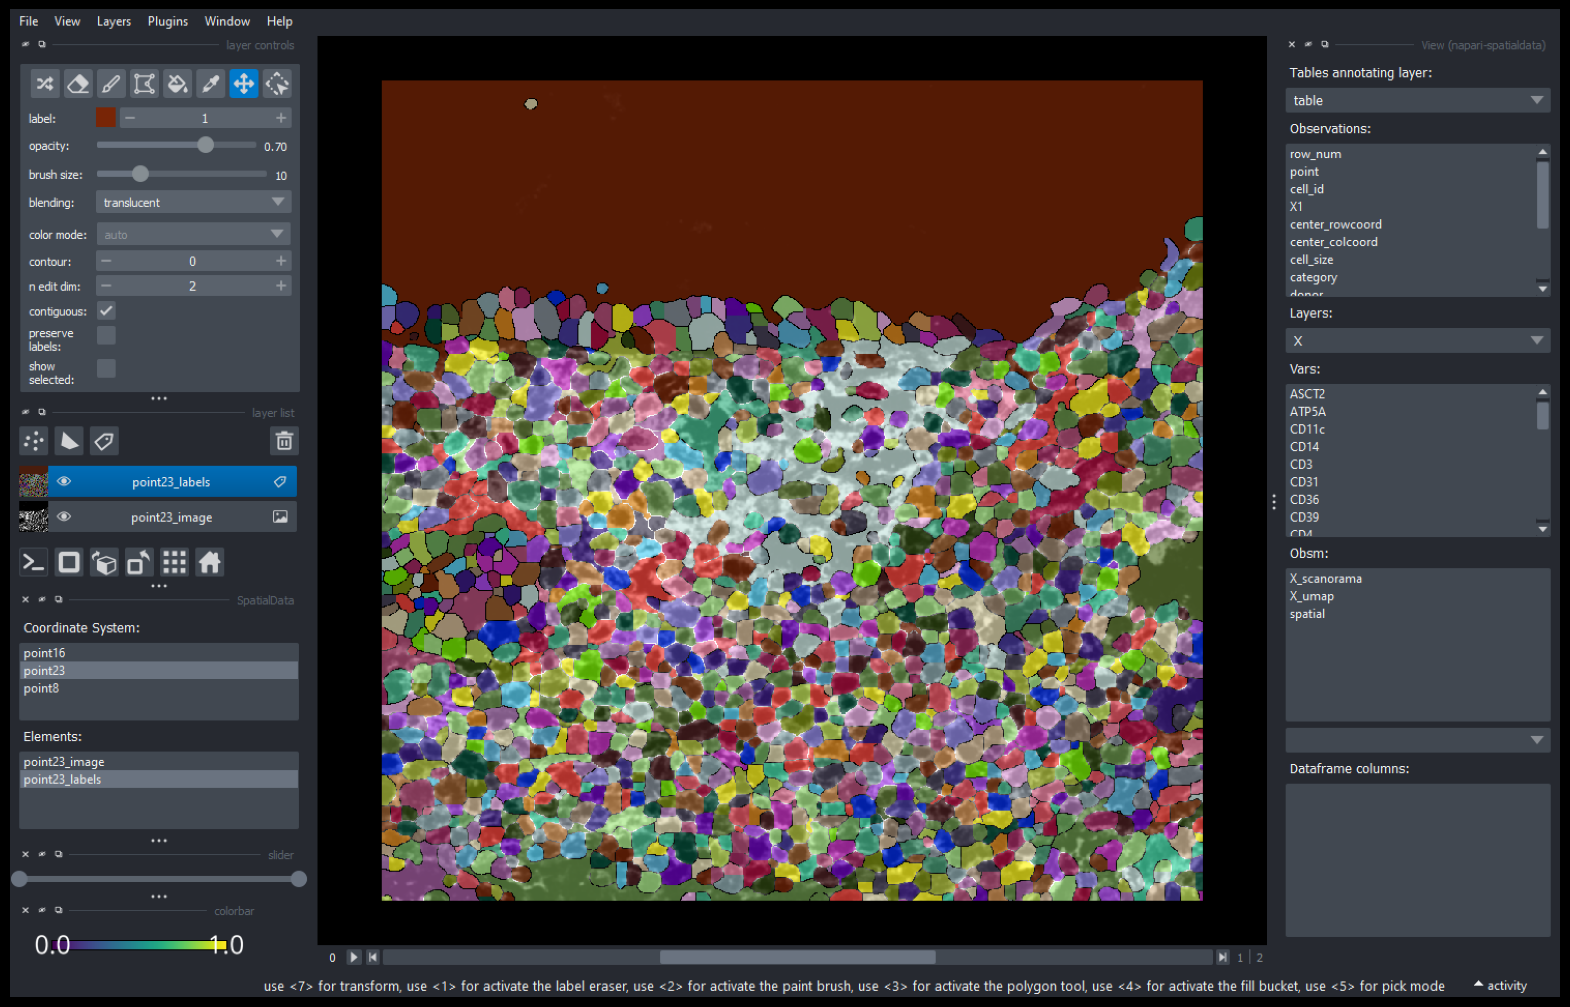

In [10]:
plt.imshow(interactive.screenshot())
plt.axis('off')

## Load axis with the view widget

Napari-SpatialData also comes with a "View" widget that opens automatically on the right side of Napari window.

You can also find it in the menu bar by going to Plugins > napari-spatialdata > View. The <em>obs</em>, <em>var</em> and <em>obsm</em> values are associated with the anndata of the selected layer.

To further examine a specific value, we can double click on any element on the View Widget to load it to the viewer. In the example below, we selected the layer "point23_labels" and double clicked on the gene expression, "CD14" in the view widget.

(-0.5, 1496.5, 953.5, -0.5)

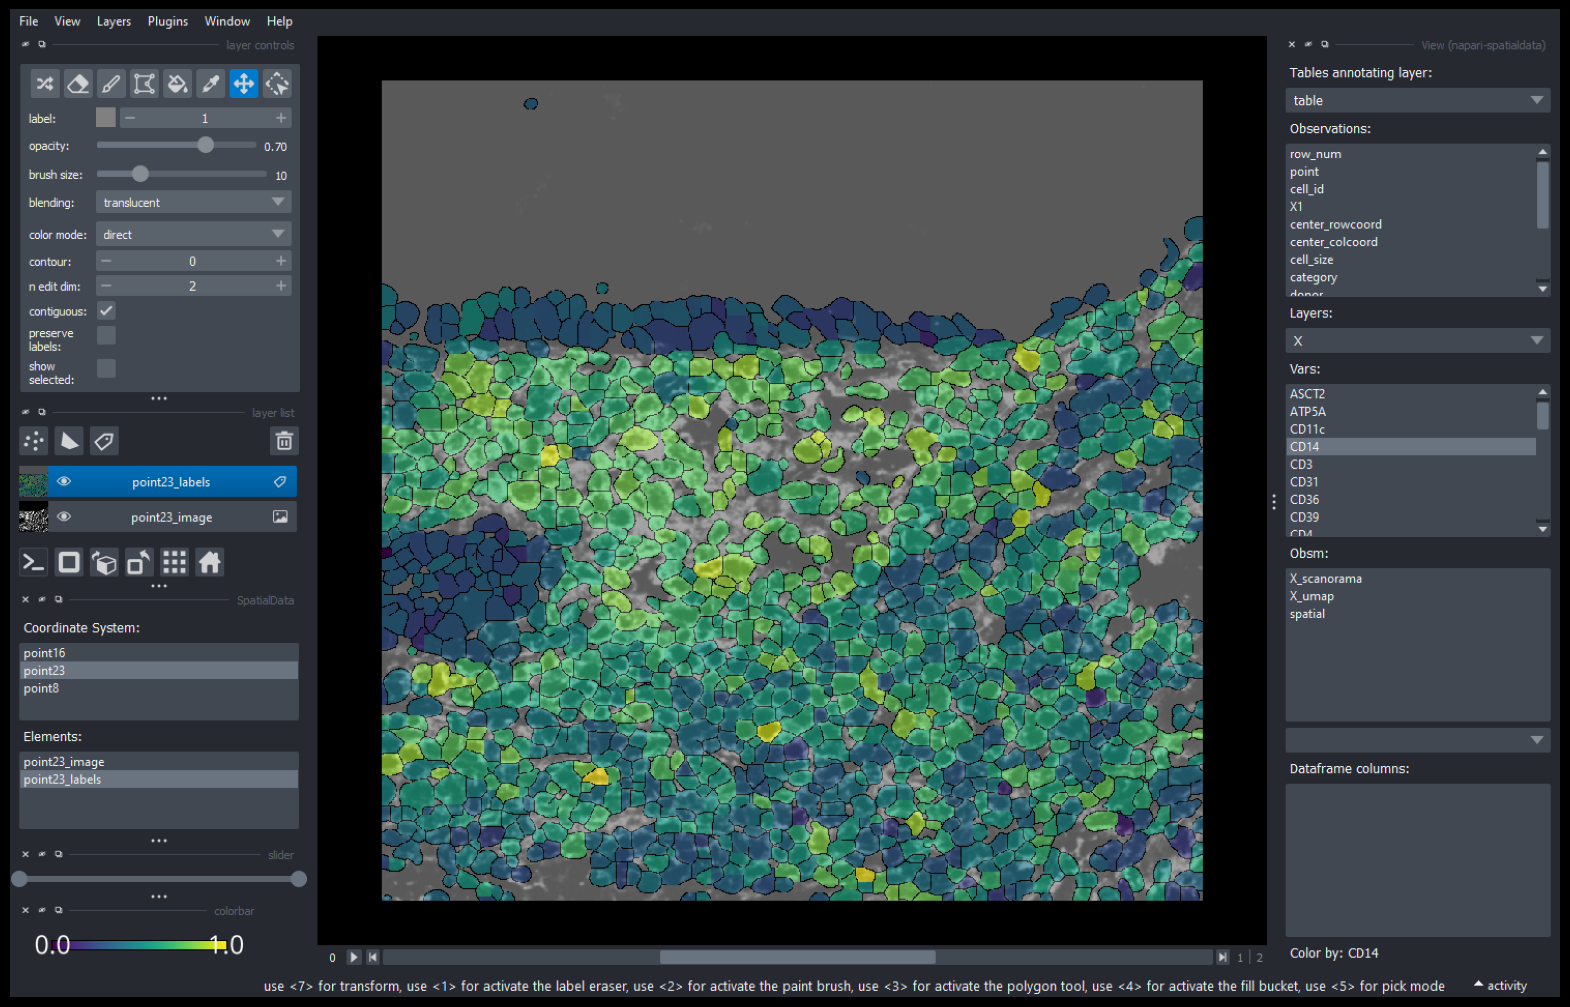

In [12]:
plt.imshow(interactive.screenshot())
plt.axis('off')

## Load axis into scatter widget

Napari-SpatialData also comes with a Scatter widget to visualise points in 2D coordinates.


In the example below, we started again with a setup where we've loaded point23_labels and point23_image to the viewer. We select the layer, "point23_labels". Then, we open the Scatter widget by going to Plugins > napari-spatialdata > Scatter. This loads the AnnData object associated with that layer into the "Scatter" Widget.

Note that widgets are moveable within a napari window. You can drag the Scatter widget to take the entire right side of the viewer. In this configuration View and Scatter widget are in separate tabs.

(-0.5, 1496.5, 1088.5, -0.5)

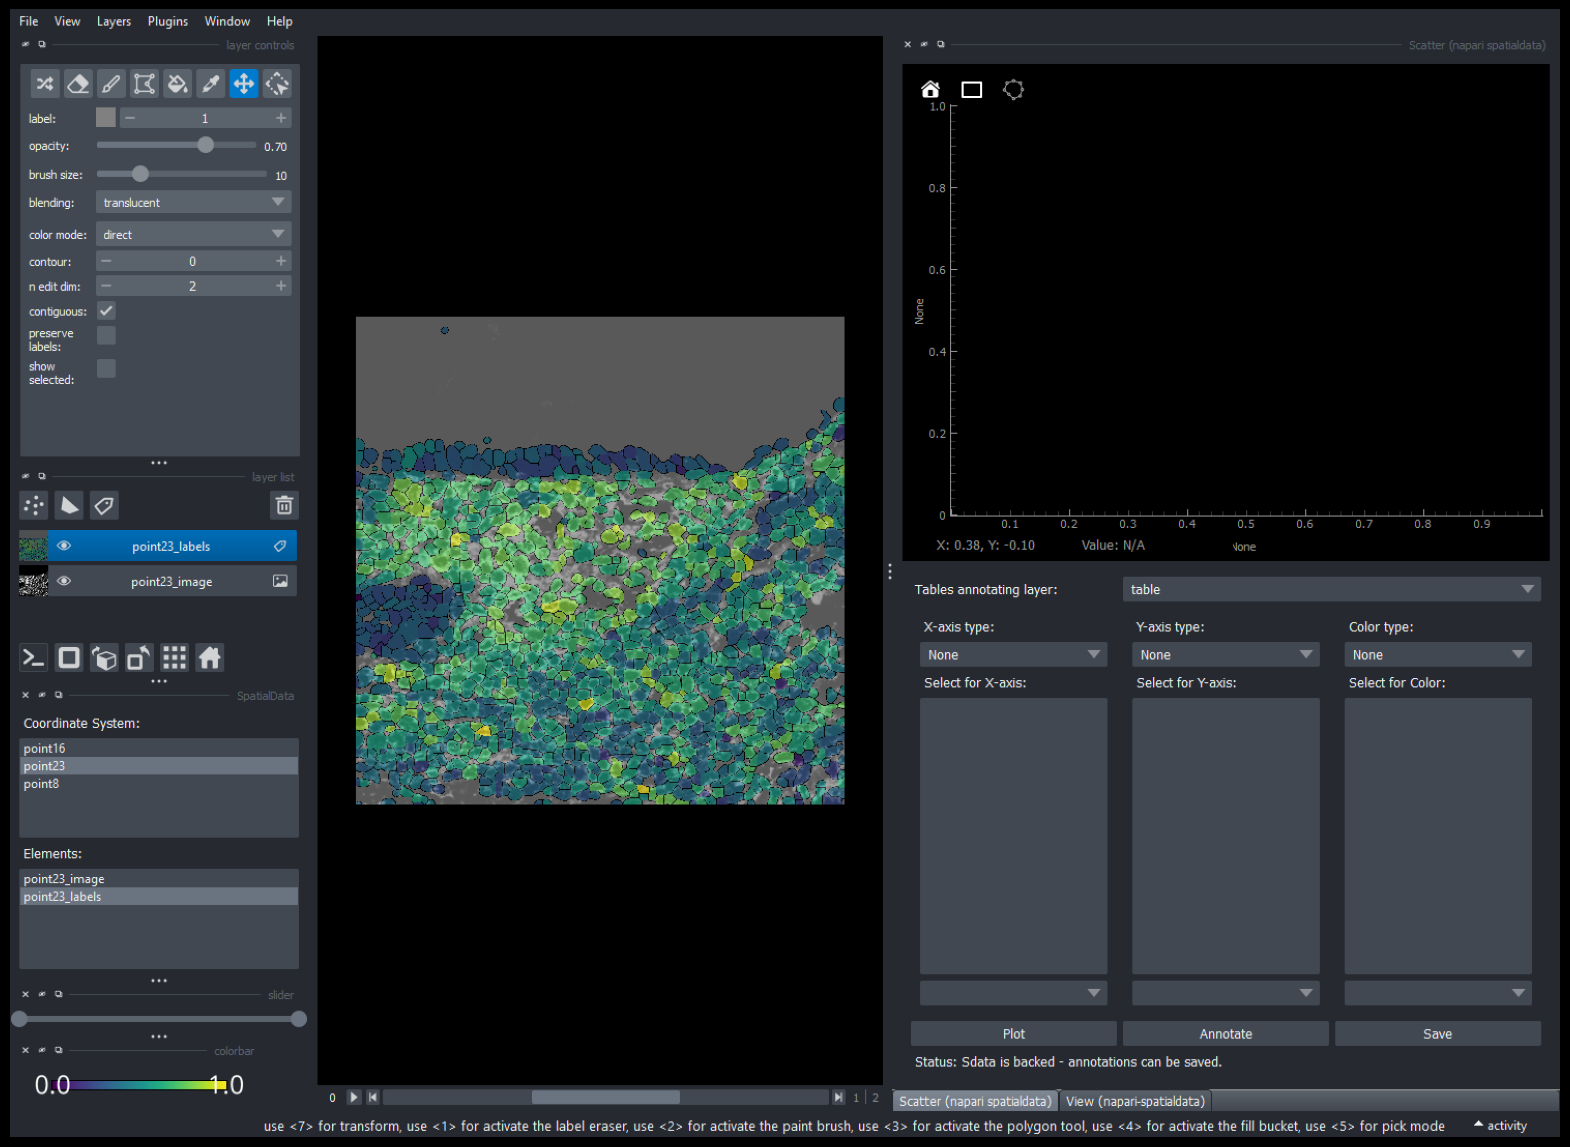

In [14]:
plt.imshow(interactive.screenshot())
plt.axis('off')

We can now pick AnnData values to visualise in the scatterplot. 

In the example below, we've selected <em>obsm["spatial"] </em>, with axis 0 in the x-axis and axis 1 in the y-axis. We're coloring each coordinate by <em>obs["cell_size"] </em>. Once we've selected the relevant data points, clicking on "Plot" generates a scatterplot.

Note that the Scatter widget y axis is inverted in comparison with the image in the Napari window.

(-0.5, 1496.5, 1088.5, -0.5)

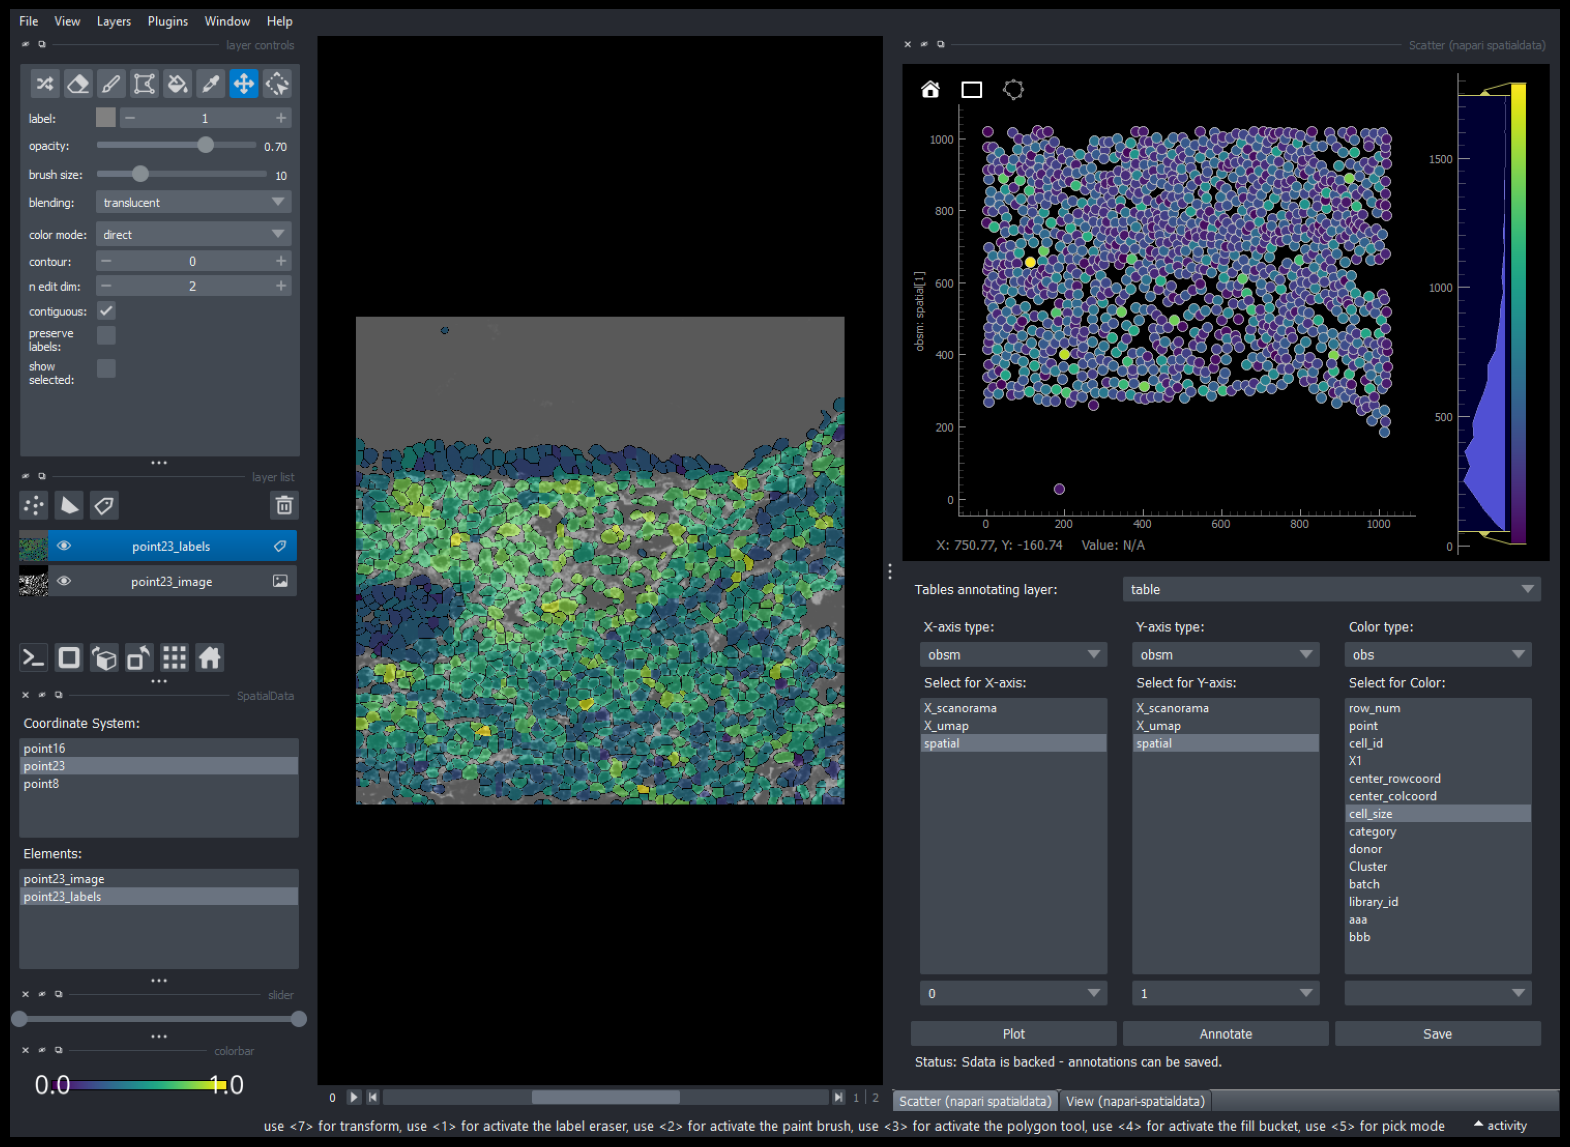

In [16]:
plt.imshow(interactive.screenshot())
plt.axis('off')

The "Scatter" widget also offers an interactive feature to manually select clusters of interest.

In the example below, we used the lasso tool to select a triangular region on the top left area of the scatterplot. (See scatterwidget.ipynb and scatterwidget_annotion.ipynb for details of the ROI selection).

(-0.5, 1496.5, 1088.5, -0.5)

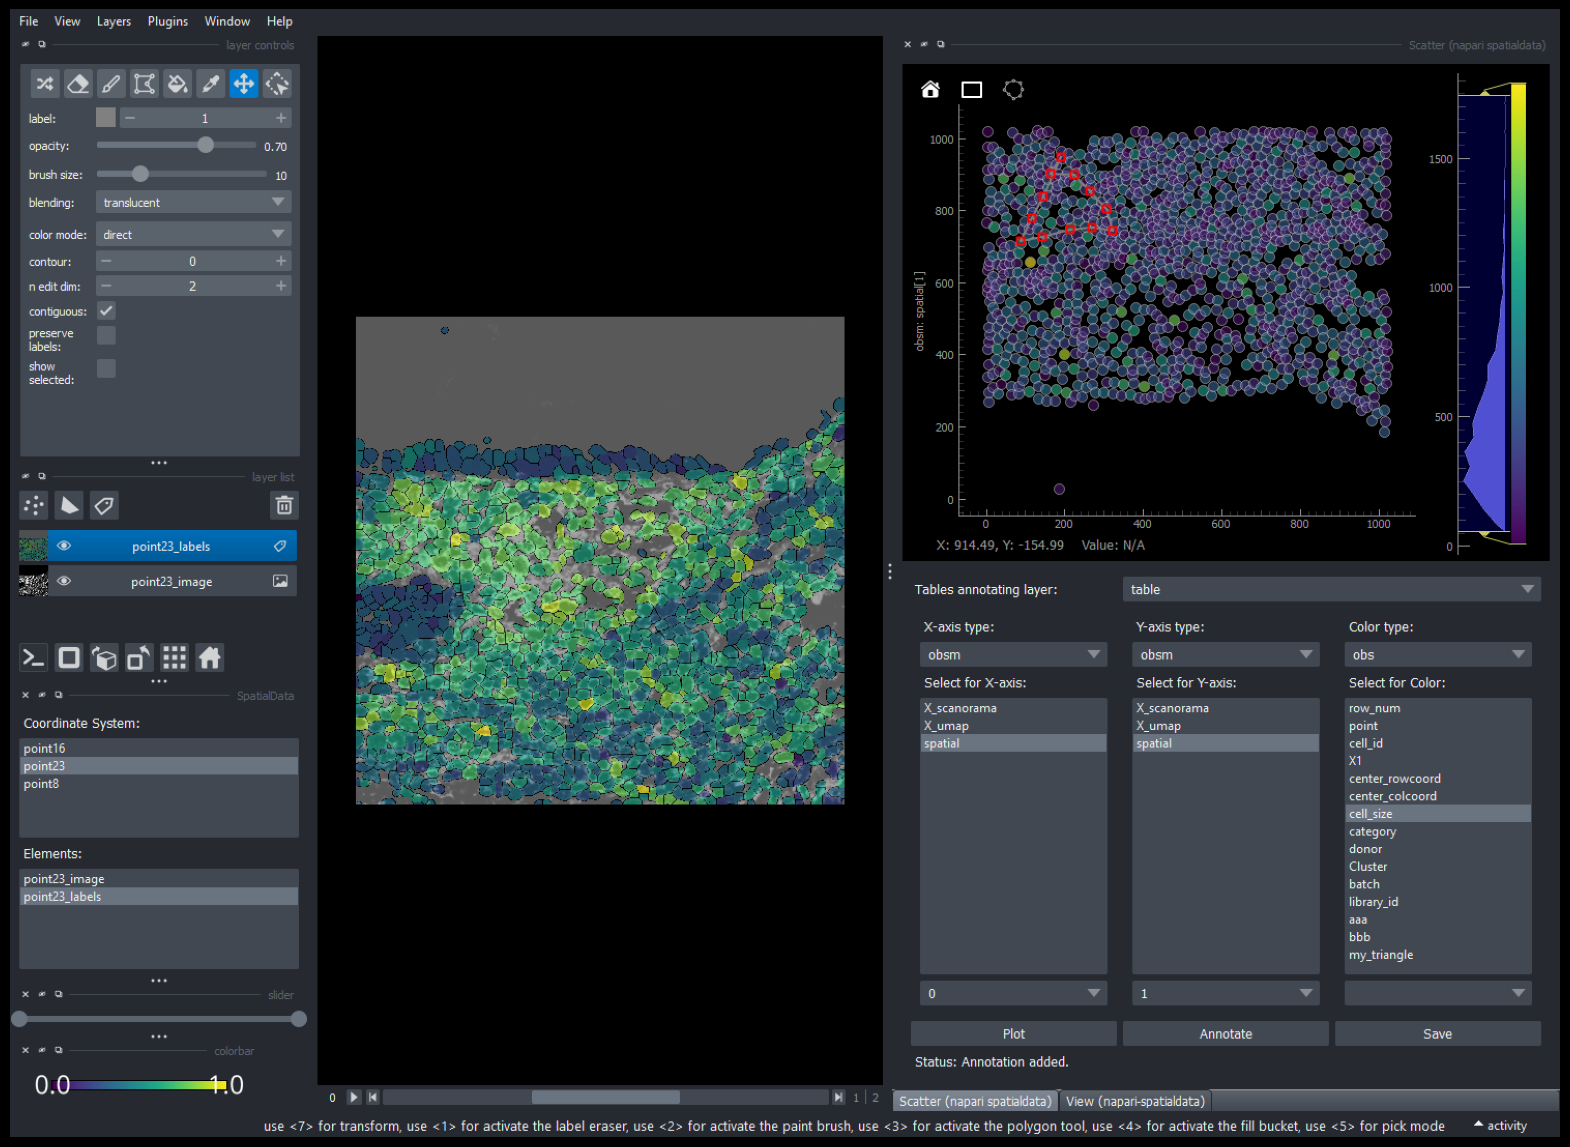

In [20]:
plt.imshow(interactive.screenshot())
plt.axis('off')

After a ROI has been created, it can be exported into AnnData by clicking on the "Annotate" button. This creates a new obs value, with the name that you can specify in the dialog.

 We will use the new annotation as the color type for our scatterplot. After selection of the new color click "Plot" to generate the scatterplot.

(-0.5, 1496.5, 1088.5, -0.5)

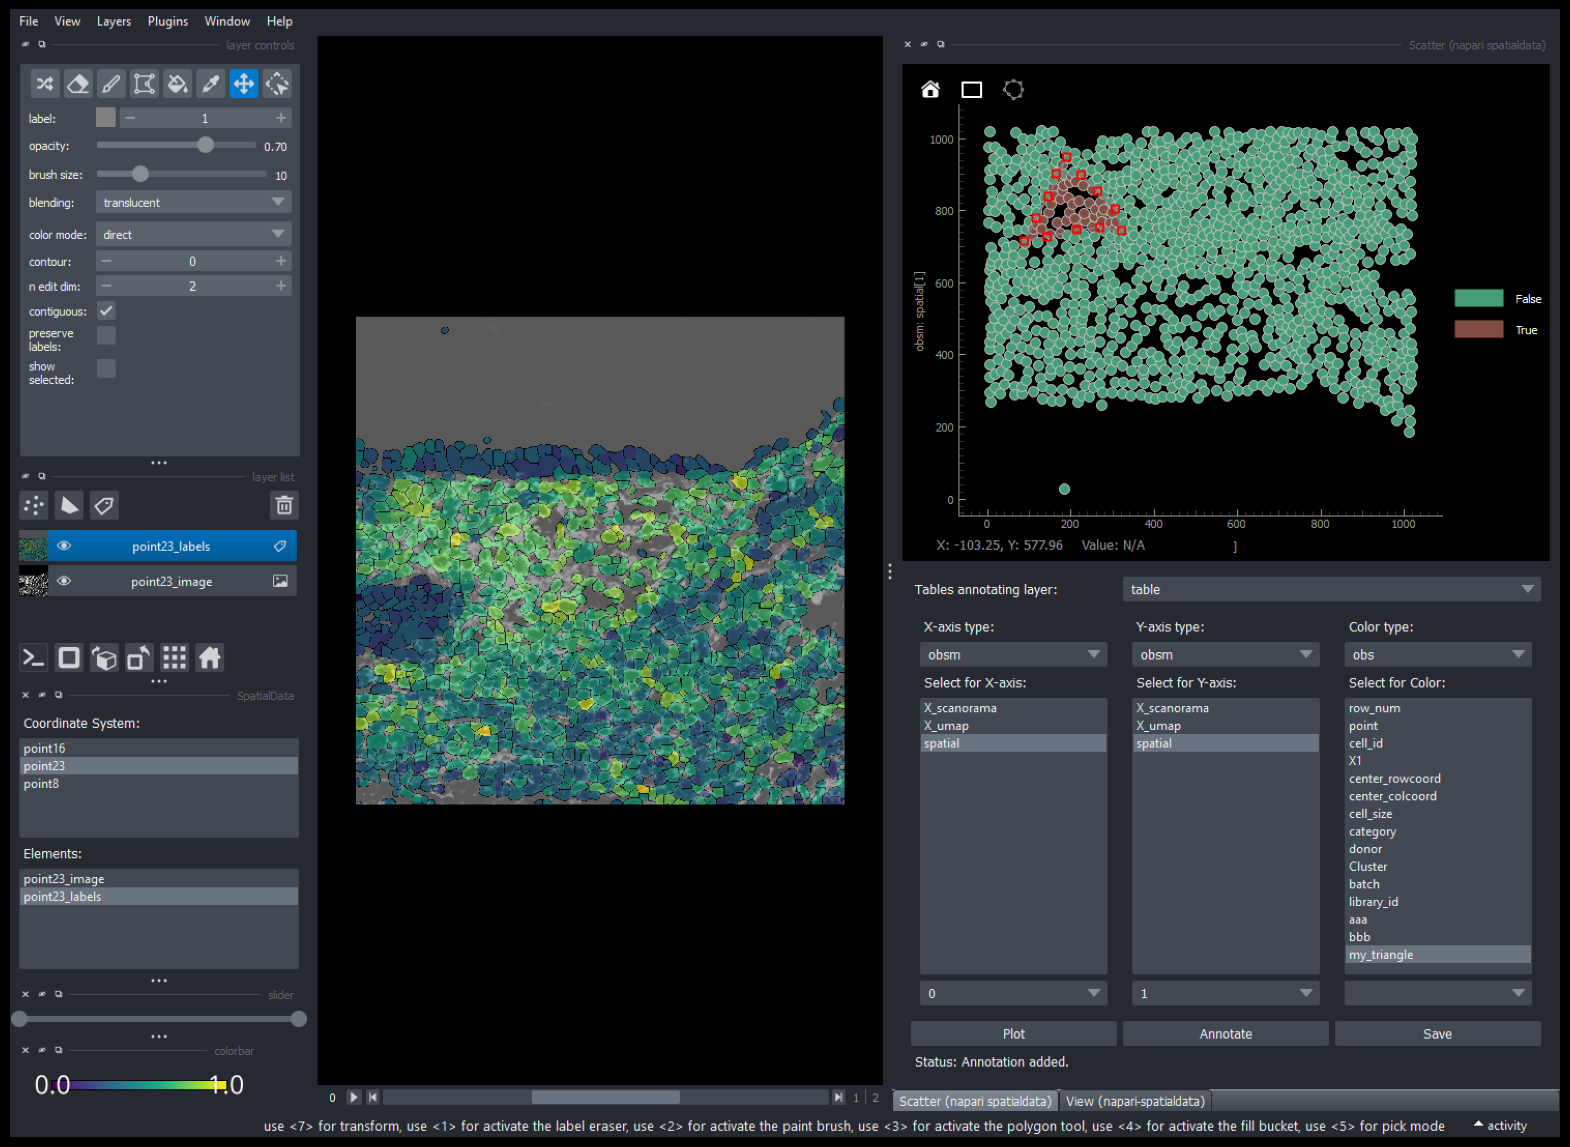

In [22]:
plt.imshow(interactive.screenshot())
plt.axis('off')

We can also view this in the "View" widget and use to color existing labels. 

You can find the new annotation at the bottom of "Observations". Double click it to re-color the labels.

(-0.5, 1496.5, 1088.5, -0.5)

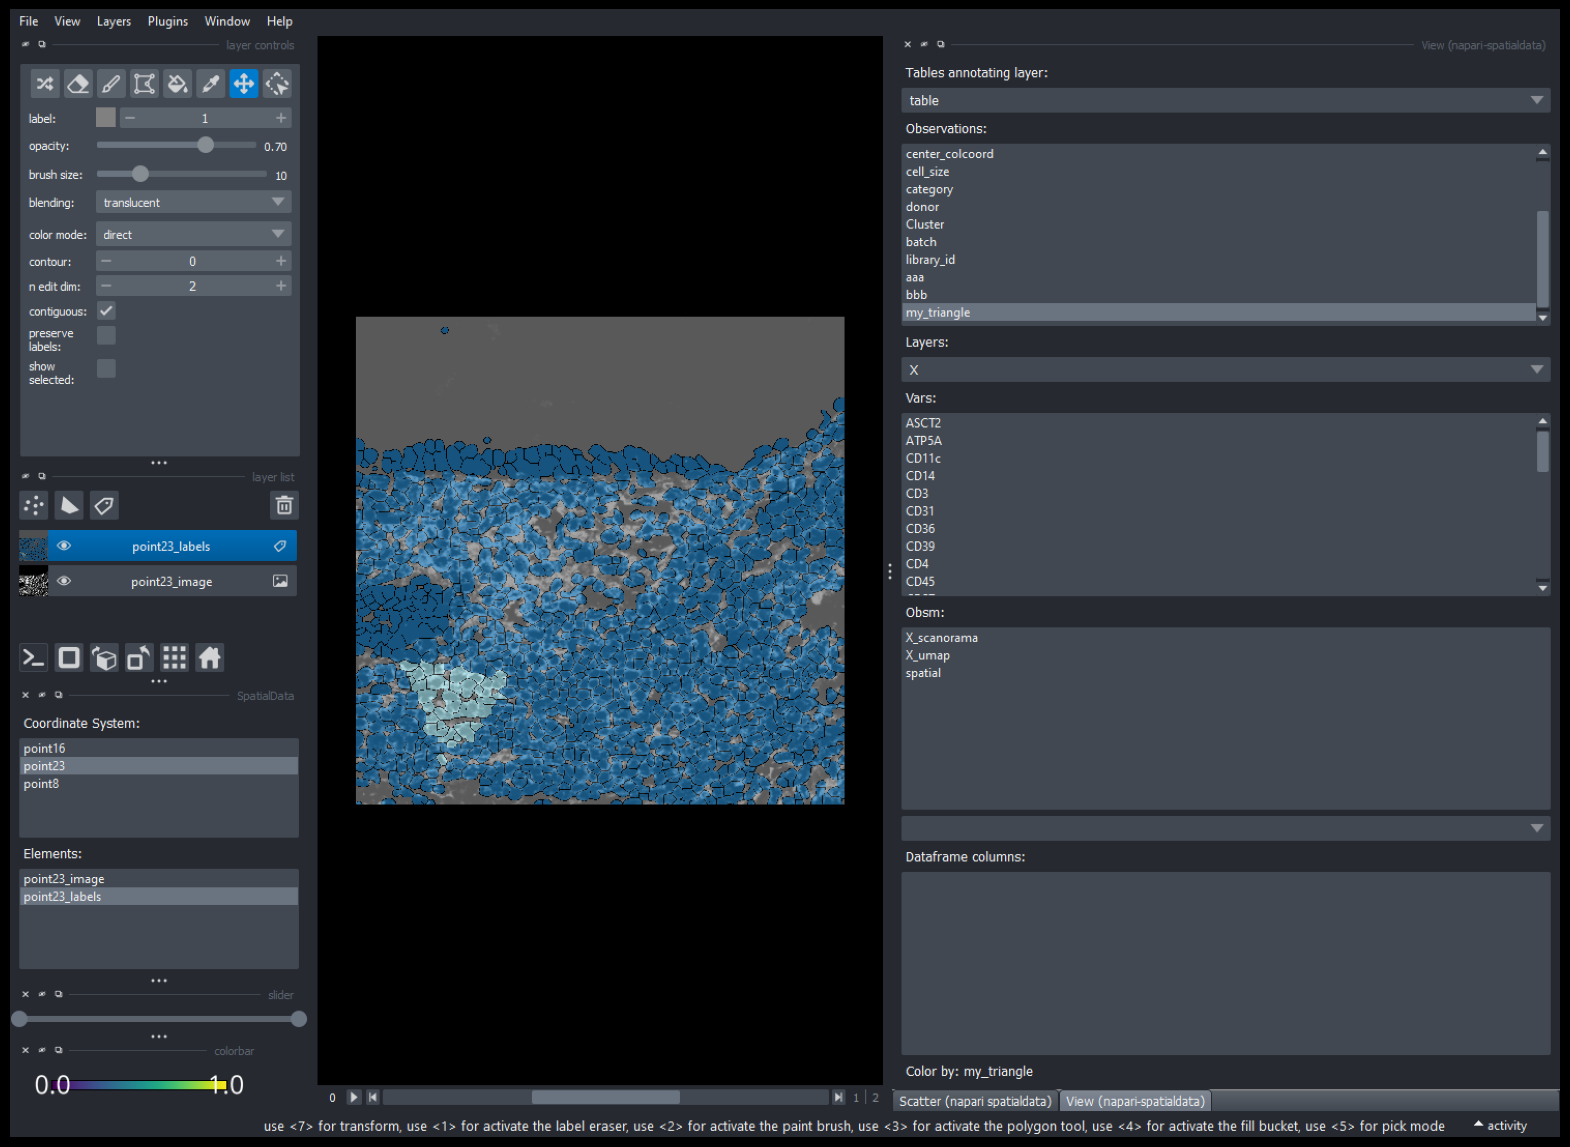

In [24]:
plt.imshow(interactive.screenshot())
plt.axis('off')